# 라이브러리 임포트

In [ ]:
from torchvision.datasets import MNIST
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.dataloader import DataLoader
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
import torch

# CUDA 설정

In [ ]:
if torch.cuda.is_available():
    cuda = torch.device('cuda')
else:
    cuda = torch.device('cpu')

print(cuda)

cuda


# 데이터 전처리 및 로드

## data augmentation

In [ ]:
train_trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.RandomCrop(28, padding=4),
    transforms.RandomChoice([
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip()
    ]),
    transforms.RandomRotation((0, 360))
])

test_trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

## data load

In [ ]:
train_data = MNIST(root='./data', download=True, train=True, transform=train_trans)
test_data = MNIST(root='./data', download=True, train=False, transform=test_trans)

In [ ]:
batch_size = 128
torch.manual_seed(777)
train_load = DataLoader(train_data, batch_size, num_workers=4, shuffle=True)
test_load = DataLoader(test_data, batch_size, num_workers=4, shuffle=True)

## 데이터 시각화

39370
(1, 28, 28)
(28, 28, 1)


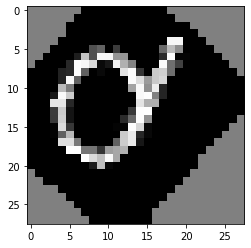

In [ ]:
def imshow(img):
    show_img = img.numpy()
    print(show_img.shape)
    plt.imshow(np.transpose(show_img, (1, 2, 0)), cmap="gray")
    print(np.transpose(show_img, (1, 2, 0)).shape)
    plt.show()

rand = np.random.randint(len(train_data))
print(rand)
imshow(train_data[rand][0])

# 모델 정의

## Pretrained-model

In [ ]:
model = torchvision.models.densenet161(pretrained=True)
# for param in model.parameters():  # weight를 고정시키고 사용할 경우 쓰는 코드
#     param.requires_grad = False

In [ ]:
# 출력층과 입력층을 데이터에 맞게 변환
model.features.conv0 = nn.Conv2d(1, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
model.classifier = nn.Sequential(
    nn.Linear(2208, 256, True),
    nn.ReLU(),
    nn.Linear(256, 128, True),
    nn.ReLU(),
    nn.Linear(128, 10, True)
)


## DNN

In [ ]:
class DNN(nn.Module):
    def __init__(self, num_class=10):
        super(DNN, self).__init__()     
        self.layer1 = nn.Linear(28*28, 256)
        self.dropout1 = nn.Dropout(0.5)
        self.layer2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.5)
        self.layer3 = nn.Linear(128, num_class)
        self.model = nn.Sequential(
            self.layer1,
            nn.BatchNorm1d(256),
            nn.ReLU(),
            self.dropout1,
            self.layer2,
            nn.BatchNorm1d(128),
            nn.ReLU(),
            self.layer3
        )
    
    def forward(self, x):
        out = self.model(x.view(-1, 28*28))
        return out

## CNN

In [ ]:
class CNN(nn.Module):
    def __init__(self, num_classes = 10):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size = (3, 3), stride=1, padding=1),
            #nn.BatchNorm2d(64),
            nn.ReLU()#,
            #nn.Dropout(0.5)
        )
        self.maxpool = nn.MaxPool2d(2)
        self.conv2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size = (3, 3), stride=1, padding=1),
            #nn.BatchNorm2d(64),
            nn.ReLU()#,
            #nn.Dropout(0.5)
        )
        
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size = (3, 3), stride=1, padding=1),
            #nn.BatchNorm2d(128),
            nn.ReLU()#,
            #nn.Dropout(0.5)
        )
        
        self.conv4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size = (3, 3), stride=1, padding=1),
            #nn.BatchNorm2d(128),
            nn.ReLU()#,
            #nn.Dropout(0.5)
        )
        
        self.conv5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size = (3, 3), stride=1, padding=1),
            #nn.BatchNorm2d(256),
            nn.ReLU()#,
           # nn.Dropout(0.5)
        )
        
        self.conv6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size = (3, 3), stride=1, padding=1),
            #nn.BatchNorm2d(256),
            nn.ReLU()#,
            #nn.Dropout(0.5)
        )
        
        self.conv7 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size = (3, 3), stride=1, padding=1),
            #nn.BatchNorm2d(512),
            nn.ReLU()#,
            #nn.Dropout(0.5)
        )
        
        self.conv8 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size = (3, 3), stride=1, padding=1),
            #nn.BatchNorm2d(512),
            nn.ReLU()
        )
        
        self.fc = nn.Sequential(
            nn.Linear(512*3*3, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )
        
    def forward(self, x):
        x=self.conv1(x)
        x=self.maxpool(x)
        x=self.conv2(x)
        
        x=self.conv3(x)
        x=self.maxpool(x)
        x=self.conv4(x)
        
        x=self.maxpool(x)
        x=self.conv5(x)
        x=self.conv6(x)
        x=self.conv7(x)
        x=self.conv8(x)
        
        x=x.view(x.size(0), -1)
        x = self.fc(x)

        return x

## 모델 선언

In [ ]:
model = CNN()
print(model)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (conv4): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (conv5): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (conv6): Sequential(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (conv7): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (conv8): Sequential(
    (0): Conv2d(512, 512, kernel_size=(3, 3), stri

# 평가 함수

In [ ]:
def evaluate(model, test_loader):
    model.eval()
    
    val_loss = 0
    correct = 0
    
    with torch.no_grad():
        for batch_idx, sample in enumerate(test_loader):
            data, label = sample
            data = data.to(cuda)
            label = label.to(cuda)

            output = model(data)
            loss = criterion(output,label)
            val_loss += loss.item()

            prediction = output.max(1, keepdim=True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()

        val_loss /= len(test_loader.dataset)
        val_acc = (100. * correct) / len(test_loader.dataset)


    return val_loss, val_acc

# 학습

In [ ]:
opt = torch.optim.Adam([param for param in model.parameters() if param.requires_grad], lr=0.001)
# 미분값이 0에 가까워질수록 학습률을 줄여주기 위해 사용한다. lr에 감마값을 곱해준다.
scheduler = torch.optim.lr_scheduler.StepLR(opt,step_size = 10, gamma = 0.8) 
criterion = nn.CrossEntropyLoss().to(cuda)
save_path = '/MNIST/MNIST_CNN_models/'
model = model.to(cuda)

for epoch in range(50):
    model.train()

    train_acc = []
    train_loss = []

    for batch, train in enumerate(train_load):
        data, label = train

        data = data.to(cuda)
        label = label.to(cuda)

        out = model(data)

        loss = criterion(out, label)

        train_loss += [loss.item()]

        pred = out.max(1, keepdim=True)[1]

        acc = pred.eq(label.view_as(pred)).sum().item()

        train_acc += [acc]

        opt.zero_grad()
        loss.backward()
        opt.step()

        #print(f'Batch Size : {batch+1}\t Loss : {loss.item():.6f}\t Acc : {100*(acc / len(data))}')

    epoch_loss = sum(train_loss) / len(train_load.dataset)
    epoch_acc = (100.*sum(train_acc)) / len(train_load.dataset)
    print(f'epoch : {epoch+1}\t Loss : {epoch_loss:.6f}\t Acc : {epoch_acc}')
    print(evaluate(model, test_load))

    scheduler.step()

#     if (epoch+1) % 50 == 0:
#         torch.save(model.state_dict(), save_path+'model_12'+str(epoch+1)+'.pth')
        

epoch : 1	 Loss : 0.014442	 Acc : 28.816666666666666
(0.009659464514255523, 50.16)
epoch : 2	 Loss : 0.008966	 Acc : 57.68333333333333
(0.007453957045078278, 66.63)
epoch : 3	 Loss : 0.006870	 Acc : 68.62333333333333
(0.006364388579130173, 72.64)
epoch : 4	 Loss : 0.005460	 Acc : 76.96
(0.003852068844437599, 83.53)
epoch : 5	 Loss : 0.004437	 Acc : 81.67
(0.0036188308298587797, 83.94)
epoch : 6	 Loss : 0.004057	 Acc : 83.58166666666666
(0.0034347049236297606, 85.93)
epoch : 7	 Loss : 0.003652	 Acc : 85.265
(0.0032415734469890592, 86.19)
epoch : 8	 Loss : 0.003442	 Acc : 85.94
(0.0025518768824636935, 88.89)
epoch : 9	 Loss : 0.003271	 Acc : 86.73
(0.0026990519627928733, 89.55)
epoch : 10	 Loss : 0.003176	 Acc : 87.15
(0.0026680547028779984, 88.25)
epoch : 11	 Loss : 0.002926	 Acc : 88.085
(0.0025316192552447317, 89.08)
epoch : 12	 Loss : 0.002852	 Acc : 88.4
(0.002407360449433327, 90.51)
epoch : 13	 Loss : 0.002765	 Acc : 88.91
(0.0025532616555690767, 90.03)
epoch : 14	 Loss : 0.002717	